# Trabalho 1 - Ciência de Dados
**Grupo 03**: Dinorah, Matheus e Pedro Lucas.

[Dataset Alzheimer](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data)

## Análise Exploratória de Dados

Vamos realizar uma análise exploratória dos dados para investigar o dataset de uma forma geral e alguns pontos especificos.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.set_palette("rocket")

In [3]:
df = pd.read_csv("alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
data = df
# Remover a coluna 'DoctorInCharge'
data = data.drop(columns=['DoctorInCharge'])

# Informações gerais
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

**Checagem de dados faltantes**

In [5]:
missing_values = data.isnull().sum()
print(missing_values)

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

**Conversão de tipos de dados**

In [6]:
data['PatientID'] = data['PatientID'].astype(str)
data['Gender'] = data['Gender'].astype('category')
data['Ethnicity'] = data['Ethnicity'].astype('category')
data['EducationLevel'] = data['EducationLevel'].astype('category')

## Correlação geral das variáveis

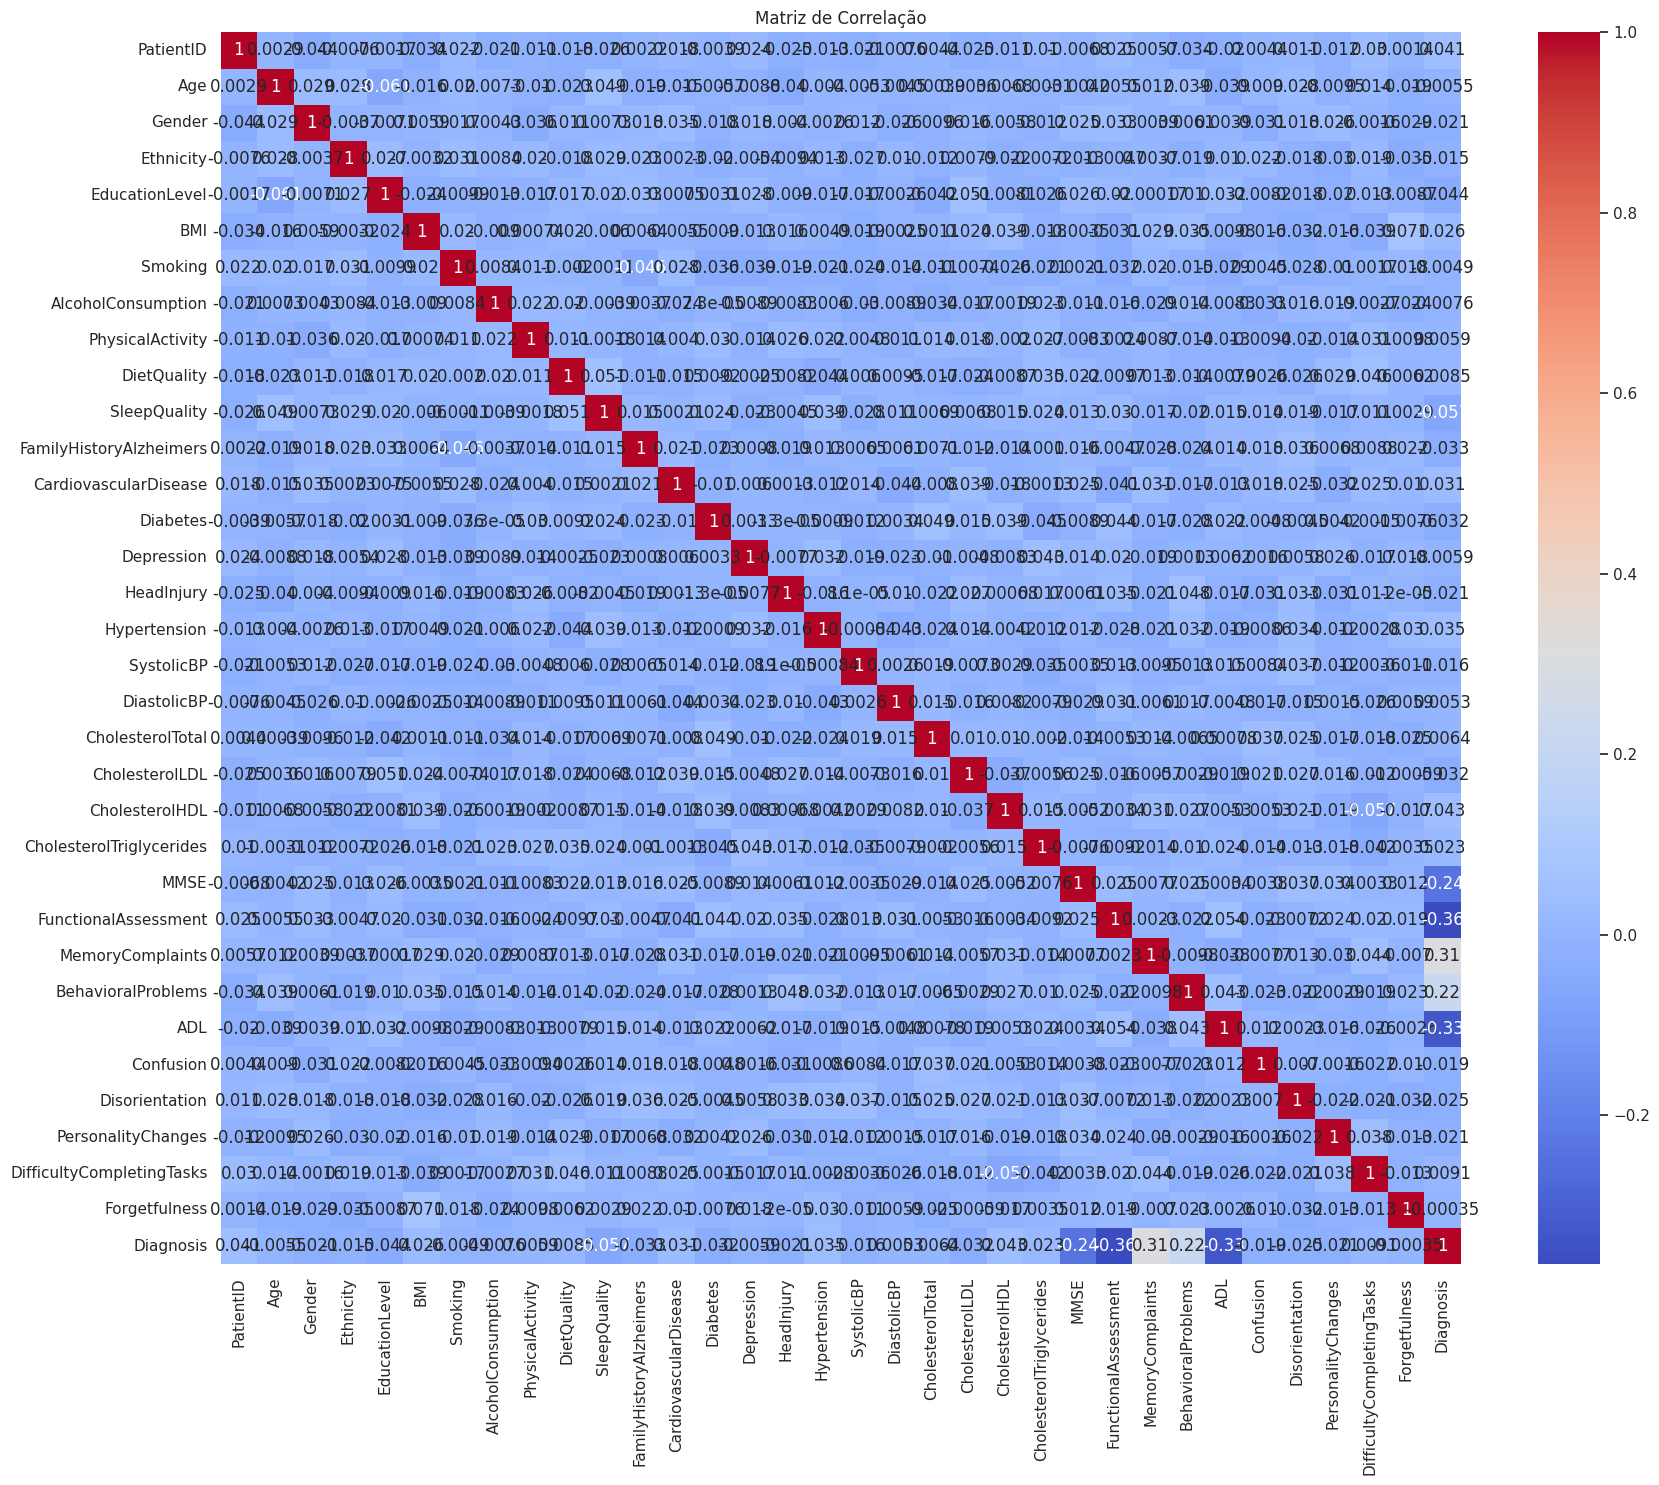

In [7]:
# Matriz de correlação
correlation_matrix = data.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

## Análise de dados por caracteristicas

### Demografia

1. Existe uma diferença significativa na prevalência de Alzheimer entre diferentes faixas etárias ?

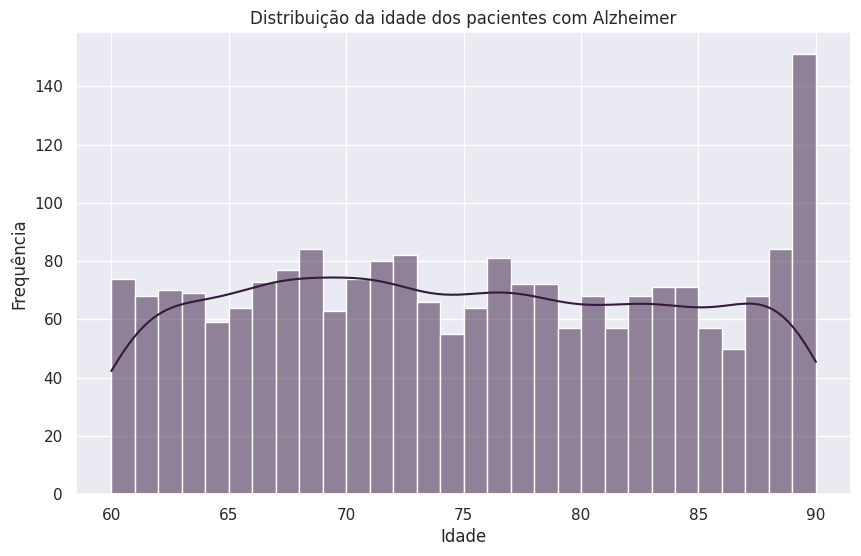

In [8]:
# Distribuição da Idade
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Distribuição da idade dos pacientes com Alzheimer')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

### Estilo de vida


1. Existe uma correlação entre atividade física e a presença de Alzheimer ?

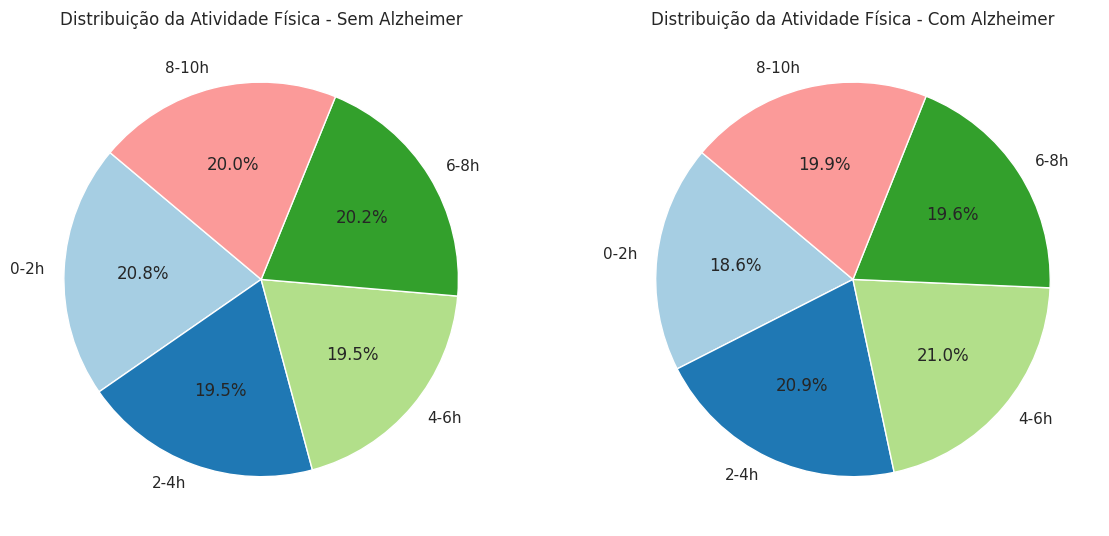

In [9]:
# Categorizar a atividade física
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2h', '2-4h', '4-6h', '6-8h', '8-10h']
df['PhysicalActivityCategory'] = pd.cut(df['PhysicalActivity'], bins=bins, labels=labels, include_lowest=True)

# Agrupar os dados e calcular as porcentagens
grouped_data = df.groupby(['PhysicalActivityCategory', 'Diagnosis'], observed=False).size().unstack().fillna(0)
grouped_data = grouped_data.apply(lambda x: x / x.sum() * 100, axis=1)

# Plotar os gráficos de pizza
fig, axs = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(aspect="equal"))

# Gráfico de pizza para pacientes sem Alzheimer
axs[0].pie(grouped_data[0], labels=grouped_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axs[0].set_title('Distribuição da Atividade Física - Sem Alzheimer')

# Gráfico de pizza para pacientes com Alzheimer
axs[1].pie(grouped_data[1], labels=grouped_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axs[1].set_title('Distribuição da Atividade Física - Com Alzheimer')

plt.show()

### Sintomas

1. Quais são os sintomas mais comuns em pessoas com Alzheimer ?

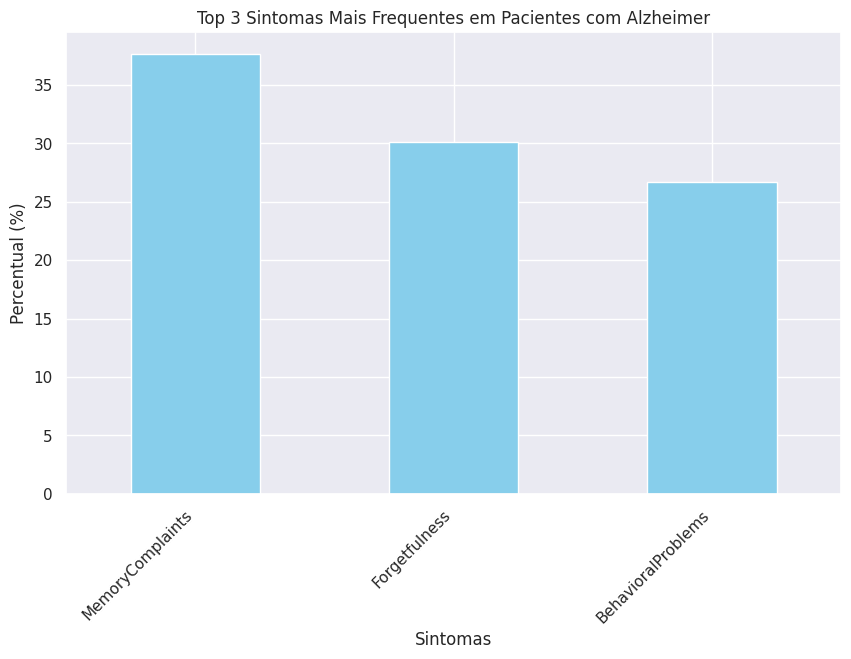

In [10]:
# Filtrar apenas os pacientes diagnosticados com Alzheimer
df_alzheimer = df[df['Diagnosis'] == 1]

# Lista das colunas de sintomas
sintomas_colunas = [
    'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation',
    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness'
]

# Calcular a soma de cada sintoma
sintomas_frequencia = df_alzheimer[sintomas_colunas].sum()

# Calcular o percentual de cada sintoma
total_pacientes = len(df_alzheimer)
percentuais_sintomas = (sintomas_frequencia / total_pacientes) * 100

# Obter os top 3 sintomas mais frequentes
top_3_sintomas = percentuais_sintomas.nlargest(3)

# Criar o gráfico
plt.figure(figsize=(10, 6))
top_3_sintomas.plot(kind='bar', color='skyblue')
plt.title('Top 3 Sintomas Mais Frequentes em Pacientes com Alzheimer')
plt.xlabel('Sintomas')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.show()


2. Existe alguma correlação entre os sintomas recorrentes ?

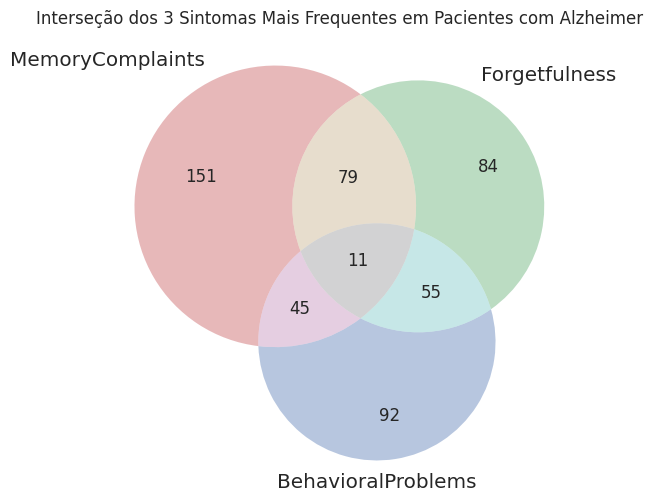

In [11]:
from matplotlib_venn import venn3

# Selecionar os 3 sintomas mais frequentes
top_3_sintomas_nomes = top_3_sintomas.index.tolist()

# Criar subconjuntos para o diagrama de Venn
sintoma1 = df_alzheimer[top_3_sintomas_nomes[0]].astype(bool)
sintoma2 = df_alzheimer[top_3_sintomas_nomes[1]].astype(bool)
sintoma3 = df_alzheimer[top_3_sintomas_nomes[2]].astype(bool)

# Contar as interseções
subset_sizes = (
    sum(sintoma1 & ~sintoma2 & ~sintoma3),  # Só Sintoma 1
    sum(~sintoma1 & sintoma2 & ~sintoma3),  # Só Sintoma 2
    sum(sintoma1 & sintoma2 & ~sintoma3),   # Sintoma 1 e 2
    sum(~sintoma1 & ~sintoma2 & sintoma3),  # Só Sintoma 3
    sum(sintoma1 & ~sintoma2 & sintoma3),   # Sintoma 1 e 3
    sum(~sintoma1 & sintoma2 & sintoma3),   # Sintoma 2 e 3
    sum(sintoma1 & sintoma2 & sintoma3)     # Sintoma 1, 2 e 3
)

# Criar o diagrama de Venn
plt.figure(figsize=(10, 6))
venn3(subsets=subset_sizes, set_labels=top_3_sintomas_nomes)
plt.title('Interseção dos 3 sintomas mais frequentes em pacientes com Alzheimer')
plt.show()


### Medições clínicas

Como os níveis de colesterol (total, LDL, HDL e triglicérides) estão relacionados ao diagnóstico de Alzheimer ?

1. **Colesterol LDL** (Lipoproteína de Baixa Densidade): Conhecido como "colesterol ruim", o LDL transporta colesterol do fígado para as células.

<ipython-input-18-7286832d2eff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colesterol.rename(columns={'Diagnosis': 'Alzheimer'}, inplace=True)
<ipython-input-18-7286832d2eff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colesterol['Alzheimer'] = df_colesterol['Alzheimer'].astype('category')
<ipython-input-18-7286832d2eff>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

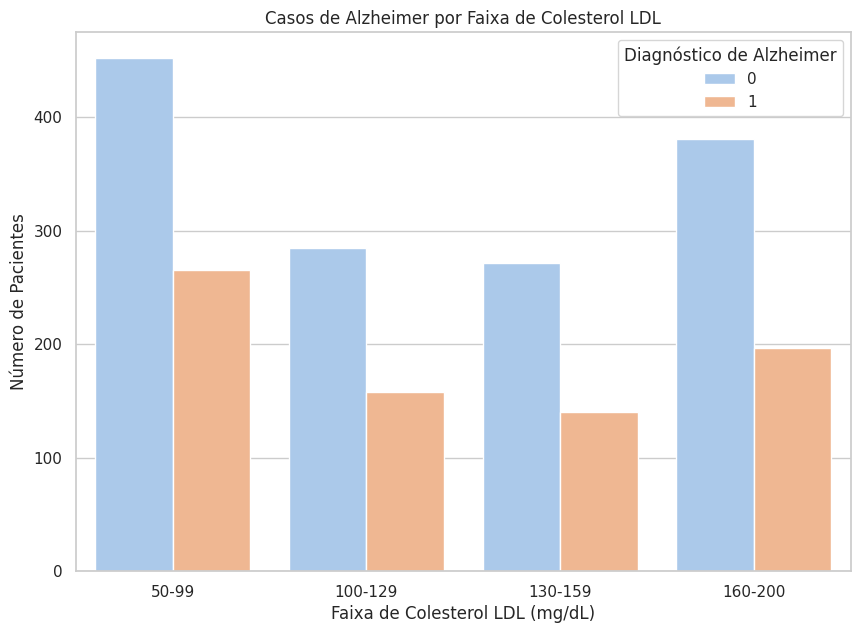

In [ ]:
# Filtrar os dados para incluir apenas as colunas de interesse
df_colesterol = data[['CholesterolLDL', 'Diagnosis']]

# Renomear a coluna Diagnosis para facilitar a leitura
df_colesterol.rename(columns={'Diagnosis': 'Alzheimer'}, inplace=True)

# Converter Alzheimer para categórico
df_colesterol['Alzheimer'] = df_colesterol['Alzheimer'].astype('category')

# Criar faixas para o colesterol ldl
bins_ldl = [50, 99, 129, 159, 200]
labels_ldl = ['50-99', '100-129', '130-159', '160-200']
df_colesterol['CholesterolLDLBin'] = pd.cut(df_colesterol['CholesterolLDL'], bins=bins_ldl, labels=labels_ldl, right=False)

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar o gráfico para o Colesterol LDL
plt.figure(figsize=(10, 7))
sns.countplot(data=df_colesterol, x='CholesterolLDLBin', hue='Alzheimer', palette='pastel')
plt.title('Casos de Alzheimer por Faixa de Colesterol LDL')
plt.xlabel('Faixa de Colesterol LDL (mg/dL)')
plt.ylabel('Número de Pacientes')
plt.legend(title='Diagnóstico de Alzheimer')

plt.show()

2. **Colesterol HDL** (Lipoproteína de Alta Densidade): Conhecido como "colesterol bom", o HDL ajuda a remover o colesterol LDL das artérias e leva-o de volta ao fígado.


<ipython-input-15-aef491acc0d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colesterol.rename(columns={'Diagnosis': 'Alzheimer'}, inplace=True)
<ipython-input-15-aef491acc0d8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colesterol['Alzheimer'] = df_colesterol['Alzheimer'].astype('category')
<ipython-input-15-aef491acc0d8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

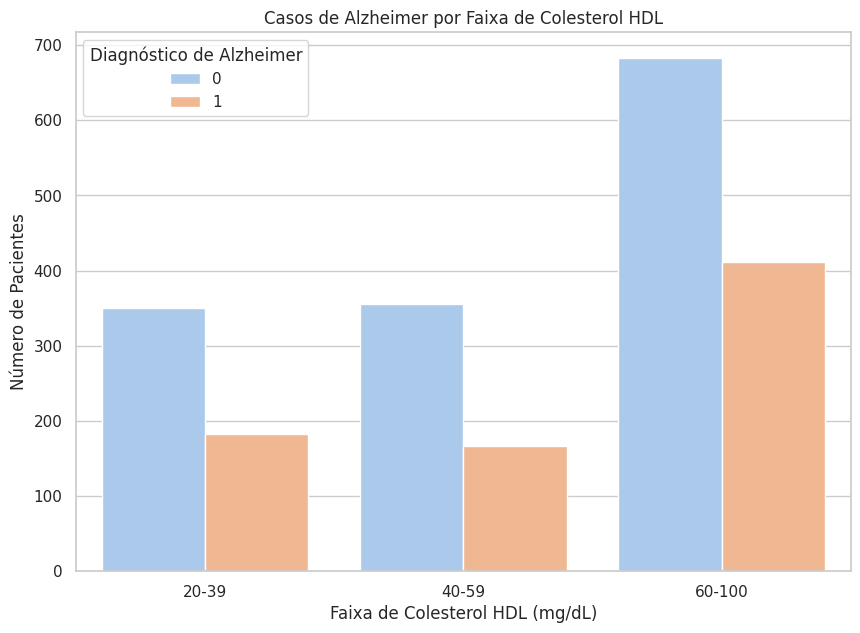

In [ ]:
# Filtrar os dados para incluir apenas as colunas de interesse
df_colesterol = data[['CholesterolHDL', 'Diagnosis']]

# Renomear a coluna Diagnosis para facilitar a leitura
df_colesterol.rename(columns={'Diagnosis': 'Alzheimer'}, inplace=True)

# Converter Alzheimer para categórico
df_colesterol['Alzheimer'] = df_colesterol['Alzheimer'].astype('category')

# Criar faixas para o colesterol hdl
bins_hdl = [20, 39, 59, 100]
labels_hdl = ['20-39', '40-59', '60-100']
df_colesterol['CholesterolHDLBin'] = pd.cut(df_colesterol['CholesterolHDL'], bins=bins_hdl, labels=labels_hdl, right=False)

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar o gráfico para o Colesterol HDL
plt.figure(figsize=(10, 7))
sns.countplot(data=df_colesterol, x='CholesterolHDLBin', hue='Alzheimer', palette='pastel')
plt.title('Casos de Alzheimer por Faixa de Colesterol HDL')
plt.xlabel('Faixa de Colesterol HDL (mg/dL)')
plt.ylabel('Número de Pacientes')
plt.legend(title='Diagnóstico de Alzheimer')

plt.show()

3. **Triglicerídeos**: São um tipo de gordura no sangue que fornece energia ao corpo.

<ipython-input-14-1b707db68e8e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colesterol.rename(columns={'Diagnosis': 'Alzheimer'}, inplace=True)
<ipython-input-14-1b707db68e8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colesterol['Alzheimer'] = df_colesterol['Alzheimer'].astype('category')
<ipython-input-14-1b707db68e8e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

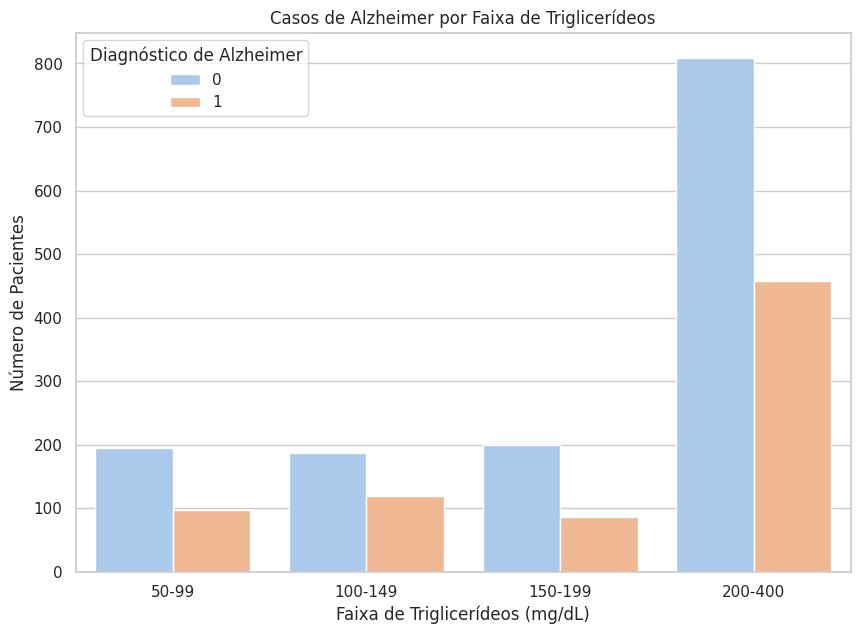

In [ ]:
# Filtrar os dados para incluir apenas as colunas de interesse
df_colesterol = data[['CholesterolTriglycerides', 'Diagnosis']]

# Renomear a coluna Diagnosis para facilitar a leitura
df_colesterol.rename(columns={'Diagnosis': 'Alzheimer'}, inplace=True)

# Converter Alzheimer para categórico
df_colesterol['Alzheimer'] = df_colesterol['Alzheimer'].astype('category')

bins_triglycerides = [50, 99, 149, 199, 400]
labels_triglycerides = ['50-99', '100-149', '150-199', '200-400']
df_colesterol['CholesterolTriglyceridesBin'] = pd.cut(df_colesterol['CholesterolTriglycerides'], bins=bins_triglycerides, labels=labels_triglycerides, right=False)

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar o gráfico para o Triglicerídeos
plt.figure(figsize=(10, 7))
sns.countplot(data=df_colesterol, x='CholesterolTriglyceridesBin', hue='Alzheimer', palette='pastel')
plt.title('Casos de Alzheimer por Faixa de Triglicerídeos')
plt.xlabel('Faixa de Triglicerídeos (mg/dL)')
plt.ylabel('Número de Pacientes')
plt.legend(title='Diagnóstico de Alzheimer')

plt.show()

4. **Colesterol total**: Refere-se à quantidade total de colesterol no sangue, incluindo LDL, HDL e outras formas de colesterol.

<ipython-input-11-220a5e644565>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colesterol.rename(columns={'Diagnosis': 'Alzheimer'}, inplace=True)
<ipython-input-11-220a5e644565>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colesterol['Alzheimer'] = df_colesterol['Alzheimer'].astype('category')
<ipython-input-11-220a5e644565>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

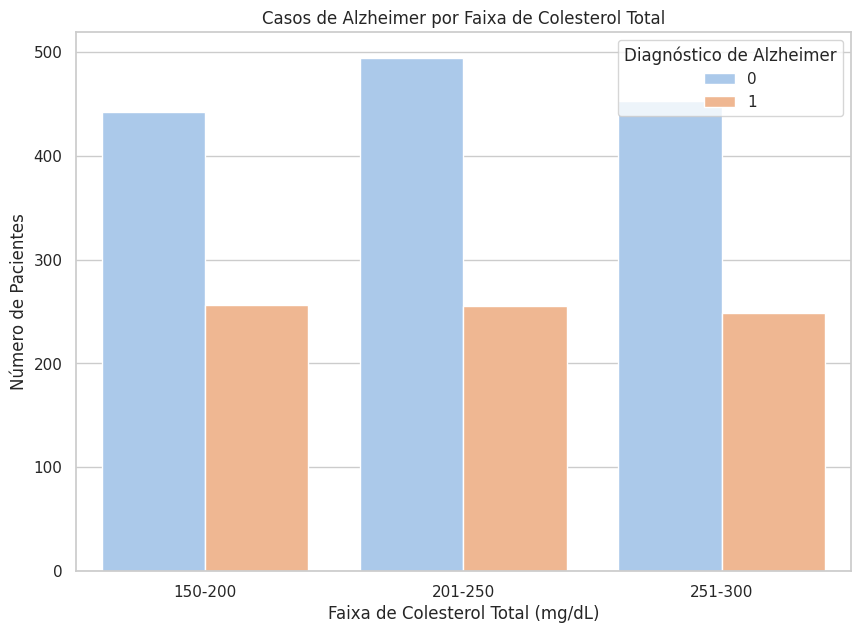

In [ ]:
# Filtrar os dados para incluir apenas as colunas de interesse
df_colesterol = data[['CholesterolTotal', 'Diagnosis']]

# Renomear a coluna Diagnosis para facilitar a leitura
df_colesterol.rename(columns={'Diagnosis': 'Alzheimer'}, inplace=True)

# Converter Alzheimer para categórico
df_colesterol['Alzheimer'] = df_colesterol['Alzheimer'].astype('category')

# Criar faixas para o colesterol total
bins_total = [150, 200, 250, 300]
labels_total = ['150-200', '201-250', '251-300']
df_colesterol['CholesterolTotalBin'] = pd.cut(df_colesterol['CholesterolTotal'], bins=bins_total, labels=labels_total, right=False)

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar o gráfico para o colesterol total
plt.figure(figsize=(10, 7))
sns.countplot(data=df_colesterol, x='CholesterolTotalBin', hue='Alzheimer', palette='pastel')
plt.title('Casos de Alzheimer por Faixa de Colesterol Total')
plt.xlabel('Faixa de Colesterol Total (mg/dL)')
plt.ylabel('Número de Pacientes')
plt.legend(title='Diagnóstico de Alzheimer')

plt.show()

## Avaliações Cognitivas e Funcional

As avaliações cognitivas e funcionais são métricas importantes para avaliar o estado mental e funcional dos pacientes, especialmente no contexto de doenças neurodegenerativas como o Alzheimer. os Dados coletados foram os seguintes:

- MMSE (Mini Exame do Estado Mental), 0 - 30, maior pontuação maior desempenho cognitivo.
- FunctionalAssessment (Avaliação Funcional), 0 - 10 , menor pontuação maior desempenho funcional.
- MemoryComplaints (Queixas de Memória), 0 - 1 (não e sim), indica se o paciente relatou ou não problemas de memória.
- BehavioralProblems (Problemas Comportamentais), 0 - 1 (não e sim), Indica a presença de comportamentos como agitação, agressividade, entre outros.
- ADL (Activities of Daily Living), 0 -10, Pontuações mais baixas indicam maior dependência nas atividades diárias.s?

<Axes: >

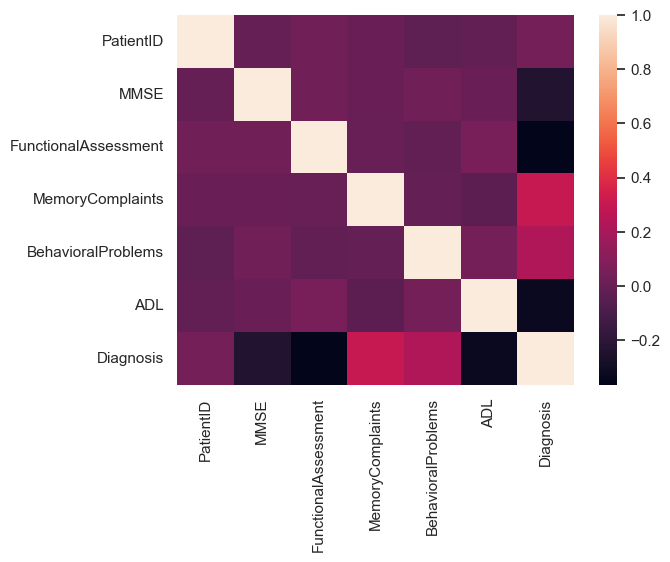

In [ ]:
cog = df.iloc[:,[0,23,24,25,26,27,33]]
corrCog = cog.corr()
sns.heatmap(corrCog)

In [ ]:
print(corrCog["Diagnosis"])

PatientID               0.041019
MMSE                   -0.237126
FunctionalAssessment   -0.364898
MemoryComplaints        0.306742
BehavioralProblems      0.224350
ADL                    -0.332346
Diagnosis               1.000000
Name: Diagnosis, dtype: float64


Como podemos observar no resultado da correlacao acima, mesmo não apresentando uma relação tão forte vamos explorar um pouco mais das variaveis FunctionlAssessment, ADL e

- há um número medio de acertos nos testes cognitivos que indiquem se o paciente possui alzheimer ou não?

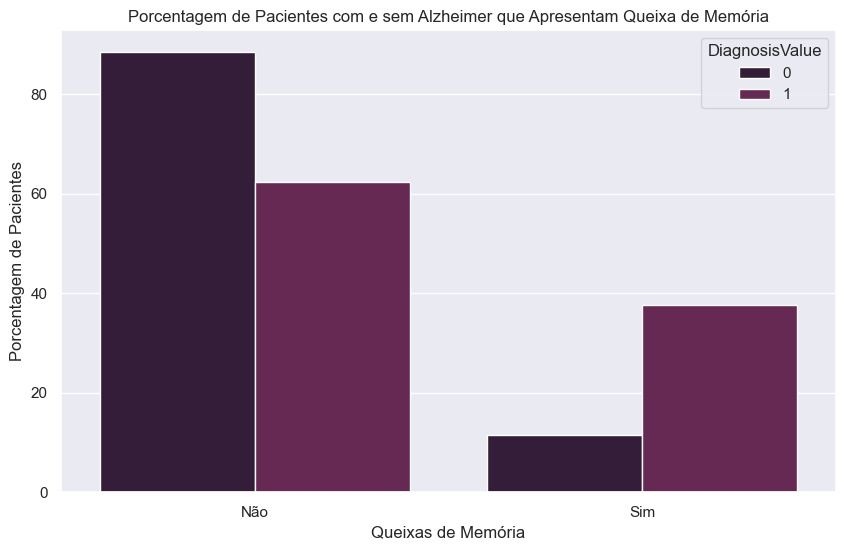

In [ ]:
# Transformar o dataset para formato tidy
tidy_data = df.melt(id_vars='MemoryComplaints', value_vars='Diagnosis', var_name='Variable', value_name='DiagnosisValue')

# Calcular as contagens
count_data = tidy_data.groupby(['MemoryComplaints', 'DiagnosisValue']).size().reset_index(name='Count')

# Calcular as porcentagens
total_counts = count_data.groupby('DiagnosisValue')['Count'].transform('sum')
count_data['Percentage'] = count_data['Count'] / total_counts * 100

# Plotar o gráfico de barras em porcentagem
plt.figure(figsize=(10, 6))
sns.barplot(data=count_data, x='MemoryComplaints', y='Percentage', hue='DiagnosisValue')
plt.title('Porcentagem de Pacientes com e sem Alzheimer que Apresentam Queixa de Memória')
plt.xlabel('Queixas de Memória')
plt.ylabel('Porcentagem de Pacientes')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.savefig("MemoryComplainta.png")
plt.show()

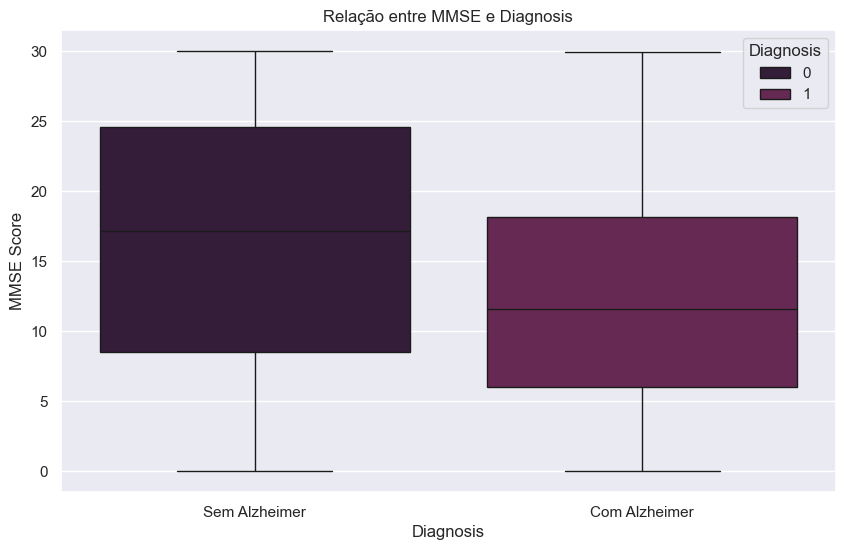

In [ ]:
# Relação entre MMSE e Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='MMSE', data=data, hue="Diagnosis")
plt.title('Relação entre MMSE e Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('MMSE Score')
plt.xticks([0, 1], ['Sem Alzheimer', 'Com Alzheimer'])
plt.show()


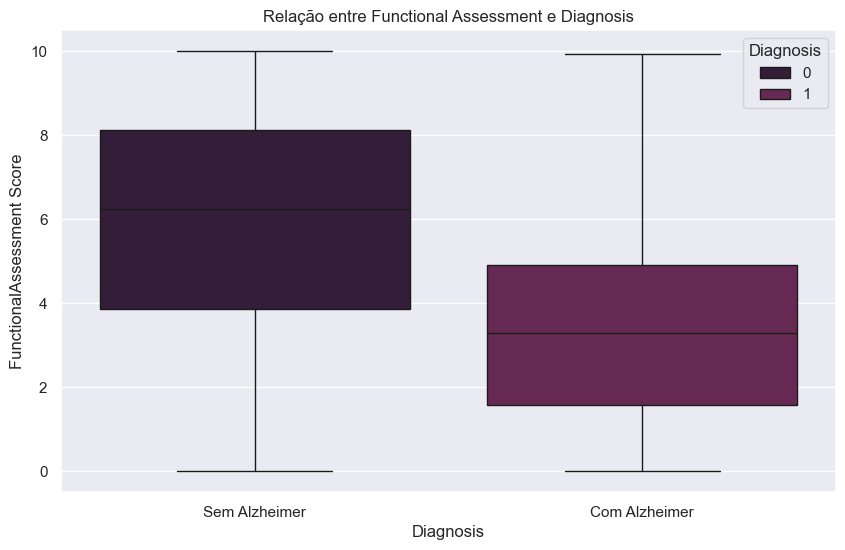

In [ ]:
# Relação entre FunctionalAssessment e Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='FunctionalAssessment', data=data, hue="Diagnosis")
plt.title('Relação entre Functional Assessment e Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('FunctionalAssessment Score')
plt.xticks([0, 1], ['Sem Alzheimer', 'Com Alzheimer'])
plt.show()

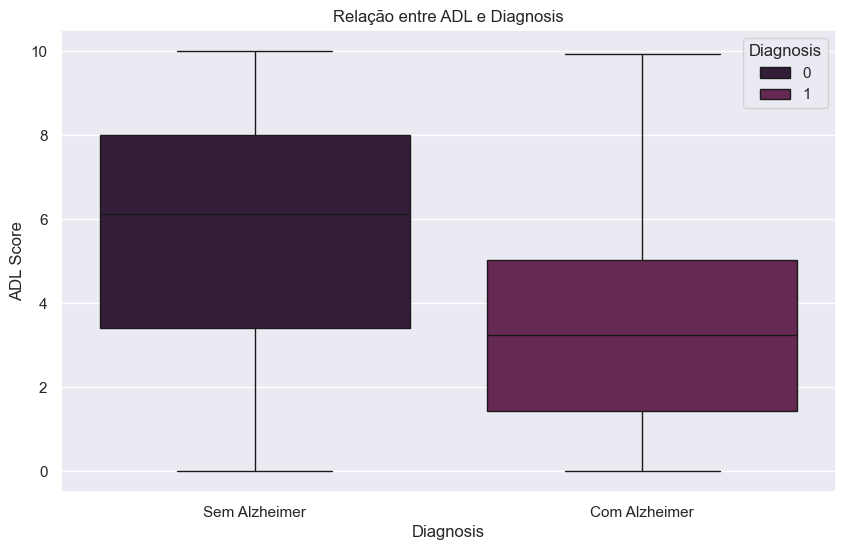

In [ ]:
# Relação entre ADL e Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='ADL', data=data,hue="Diagnosis")
plt.title('Relação entre ADL e Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('ADL Score')
plt.xticks([0, 1], ['Sem Alzheimer', 'Com Alzheimer'])
plt.show()

In [ ]:
mean_scores = data.groupby('Diagnosis')['ADL'].mean()
print(mean_scores)

Diagnosis
0    5.707951
1    3.657938
Name: ADL, dtype: float64


In [ ]:
mean_scores = data.groupby('Diagnosis')['FunctionalAssessment'].mean()
print(mean_scores)

Diagnosis
0    5.860669
1    3.653380
Name: FunctionalAssessment, dtype: float64


In [ ]:
mean_scores = data.groupby('Diagnosis')['MMSE'].mean()
print(mean_scores)

Diagnosis
0    16.265543
1    11.994657
Name: MMSE, dtype: float64


In [ ]:
# Médias das pontuações
mean_scores = data.groupby('Diagnosis')[['MMSE', 'FunctionalAssessment', 'ADL', 'MemoryComplaints']].mean()
print(mean_scores)

                MMSE  FunctionalAssessment       ADL  MemoryComplaints
Diagnosis                                                             
0          16.265543              5.860669  5.707951          0.115911
1          11.994657              3.653380  3.657938          0.376316


# Hipótese
Pacientes com escores mais baixos nos teste MMSE, FunctionalAssessment e ADL têm maior probabilidade de serem diagnosticados com Alzheimer.

por mais que seja um padrão recorrente e até lógico, vamos fudamentar essa hipotese para os nossos dados usando o t-test e P-value.

In [ ]:
from scipy.stats import ttest_ind

# MMSE
t_stat, p_val = ttest_ind(data[data['Diagnosis'] == 0]['MMSE'], data[data['Diagnosis'] == 1]['MMSE'])
print(f"T-statistic: {round(t_stat,2)}, P-value: {p_val}")

# FunctionaAssessment
t_stat, p_val = ttest_ind(data[data['Diagnosis'] == 0]['FunctionalAssessment'], data[data['Diagnosis'] == 1]['FunctionalAssessment'])
print(f"T-statistic: {round(t_stat,2)}, P-value: {p_val}")

# ADL
t_stat, p_val = ttest_ind(data[data['Diagnosis'] == 0]['ADL'], data[data['Diagnosis'] == 1]['ADL'])
print(f"T-statistic: {round(t_stat,2)}, P-value: {p_val}")

# MemoryComplaints
t_stat, p_val = ttest_ind(data[data['Diagnosis'] == 0]['MemoryComplaints'], data[data['Diagnosis'] == 1]['MemoryComplaints'])
print(f"T-statistic: {round(t_stat,2)}, P-value: {p_val}")

T-statistic: 11.31, P-value: 7.537247541446761e-29
T-statistic: 18.16, P-value: 1.1347847951397215e-68
T-statistic: 16.33, P-value: 1.396884450520792e-56
T-statistic: -14.93, P-value: 4.760134346533903e-48


## Avaliação dos Resultados

### T-statistic
A estatística t mede a diferença entre as médias dos dois grupos em unidades de erro padrão. Um valor t maior em magnitude indica uma diferença maior entre as médias.
Interpretação: Valores absolutos maiores de t indicam que a diferença entre os grupos é maior.

### P-value
O valor p indica a probabilidade de observar uma diferença tão extrema (ou mais) entre as médias dos dois grupos, assumindo que a hipótese nula (de que não há diferença real) é verdadeira.

* p < 0.05: Rejeitamos a hipótese nula. Existe uma diferença estatisticamente significativa entre as médias dos dois grupos para a variável em questão.
* p ≥ 0.05: Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que existe uma diferença significativa entre as médias dos dois grupos.

#### Resultados do MMSE
**T-statistic:** 11.31 **P-value:** 7.537247541446761e-29

#### Resultados FunctionalAssessment
**T-statistic:** 18.16, **P-value:** 1.1347847951397215e-68

#### Resultados  ADL
**T-statistic:** 16.33, **P-value:** 1.396884450520792e-56

#### Resultados Memmory Complaints
**T-statistic:** -14.93, **P-value:** 4.760134346533903e-48

### Conclusão
Portanto as hipóteses são apoiadas pelos resultados dos testes T. Escores mais baixos no MMSE, FunctionalAssessment e ADL estão significativamente associados ao diagnóstico de Alzheimer. Assim como a presença da falhas na memoria (MemoryComplaints)

Esses resultados podem ser usados para desenvolver modelos preditivos ou para identificar pacientes em risco com base nesses escores.

### Fontes
https://agenciabrasil.ebc.com.br/saude/noticia/2022-09/dia-mundial-do-alzheimer-alerta-para-aumento-de-casos-no-mundo

### TESTES

In [ ]:

# Dados dos dois grupos
group1_adl = [1, 2, 3, 4, 5]
group2_adl = [2, 3, 4, 5, 6]

# Teste t
t_stat_adl, p_value_adl = ttest_ind(group1_adl, group2_adl)

print(f'T-statistic: {t_stat_adl}')
print(f'P-value: {p_value_adl}')

T-statistic: -1.0
P-value: 0.34659350708733416


### vendo a correlacao das colunas de cada segmento
sintomas

In [ ]:
sinto = df.iloc[:,[0,28,29,30,31,32,33]]
sinto.head()

,PatientID,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,0,0,0,1,0,0
1,4752,0,0,0,0,1,0
2,4753,0,1,0,1,0,0
3,4754,0,0,0,0,0,0
4,4755,0,0,1,1,0,0


In [ ]:
corrSinto = sinto.corr()

<Axes: >

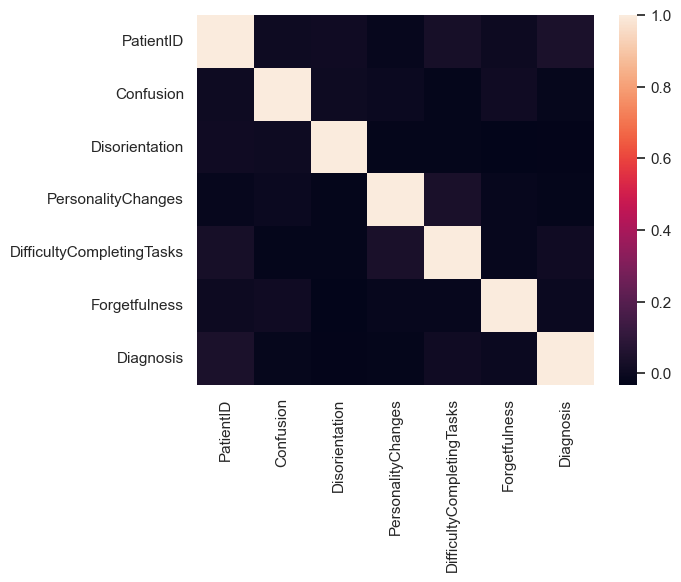

In [ ]:
sns.heatmap(corrSinto)

Clinical Measurements

<Axes: >

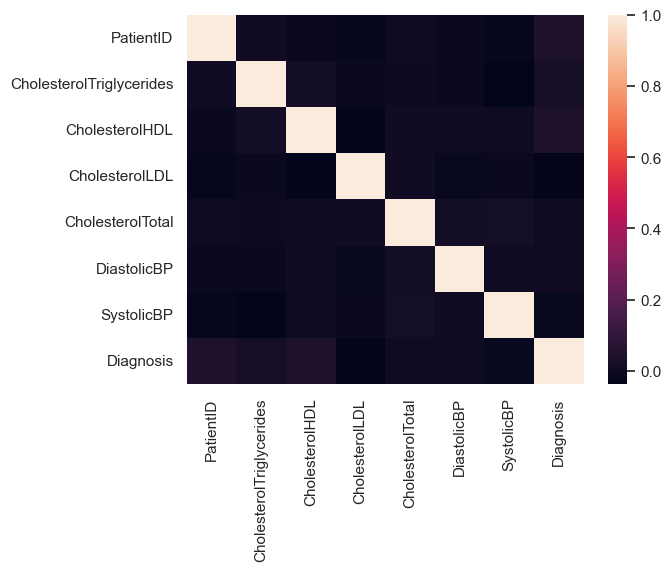

In [ ]:
clini = df.iloc[:,[0,22,21,20,19,18,17,33]]
sns.heatmap(clini.corr())

Medical History

<Axes: >

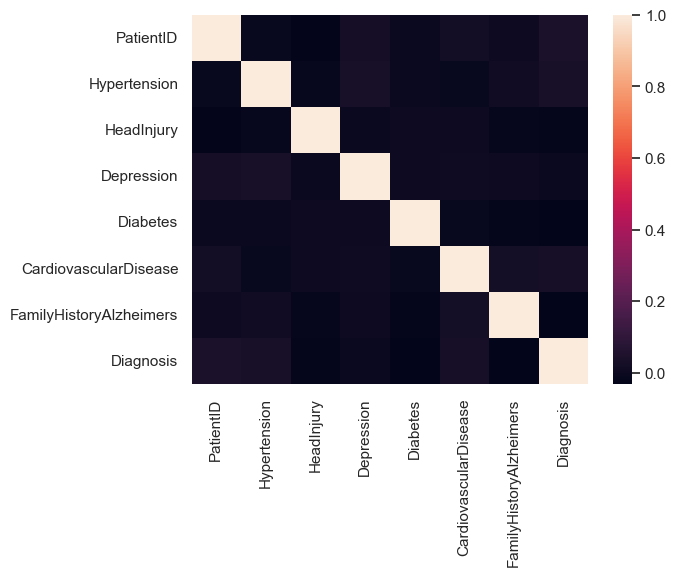

In [ ]:
hist = df.iloc[:,[0,16,15,14,13,12,11,33]]
sns.heatmap(hist.corr())

Lifestyle Factors

<Axes: >

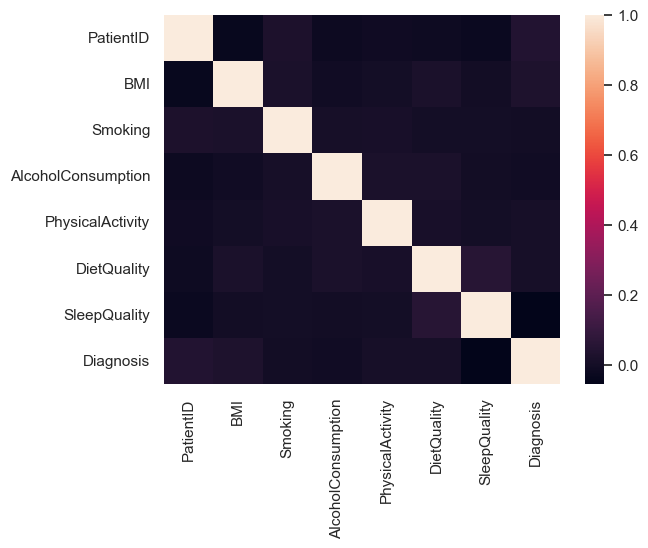

In [ ]:
lifeStyle = df.iloc[:,[0,5,6,7,8,9,10,33]]
sns.heatmap(lifeStyle.corr())

In [ ]:
df.iloc[:,[0,5,6,7,8,9,10,33]]

,PatientID,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,Diagnosis
0,4751,22.927749,0,13.297218,6.327112,1.347214,9.025679,0
1,4752,26.827681,0,4.542524,7.619885,0.518767,7.151293,0
2,4753,17.795882,0,19.555085,7.844988,1.826335,9.673574,0
3,4754,33.800817,1,12.209266,8.428001,7.435604,8.392554,0
4,4755,20.716974,0,18.454356,6.310461,0.795498,5.597238,0
...,...,...,...,...,...,...,...,...
2144,6895,39.121757,0,1.561126,4.049964,6.555306,7.535540,1
2145,6896,17.857903,0,18.767261,1.360667,2.904662,8.555256,1
2146,6897,15.476479,0,4.594670,9.886002,8.120025,5.769464,1
2147,6898,15.299911,0,8.674505,6.354282,1.263427,8.322874,1


Cognitive and Functional Assessments

In [ ]:
cog.head()

,PatientID,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
0,4751,21.463532,6.518877,0,0,1.725883,0
1,4752,20.613267,7.118696,0,0,2.592424,0
2,4753,7.356249,5.895077,0,0,7.119548,0
3,4754,13.991127,8.965106,0,1,6.481226,0
4,4755,13.517609,6.045039,0,0,0.014691,0


In [ ]:
cog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PatientID             2149 non-null   int64  
 1   MMSE                  2149 non-null   float64
 2   FunctionalAssessment  2149 non-null   float64
 3   MemoryComplaints      2149 non-null   int64  
 4   BehavioralProblems    2149 non-null   int64  
 5   ADL                   2149 non-null   float64
 6   Diagnosis             2149 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 117.7 KB


In [ ]:
cog.describe()

,PatientID,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,14.755132,5.080055,0.208004,0.156817,4.982958,0.353653
std,620.507185,8.613151,2.892743,0.405974,0.363713,2.949775,0.478214
min,4751.000000,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000
25%,5288.000000,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000
50%,5825.000000,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000
75%,6362.000000,22.161028,7.546981,0.000000,0.000000,7.581490,1.000000
max,6899.000000,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000


transformar todos valores entre 0 - 1, pra ficar melhor de comprar os graficos

In [ ]:
cog.columns

Index(['PatientID', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints',
       'BehavioralProblems', 'ADL', 'Diagnosis'],
      dtype='object')

In [ ]:
mediaMMSE = cog.groupby('Diagnosis').MMSE.mean()
print(mediaMMSE)

Diagnosis
0    16.265543
1    11.994657
Name: MMSE, dtype: float64


### graficos para as hipoteses

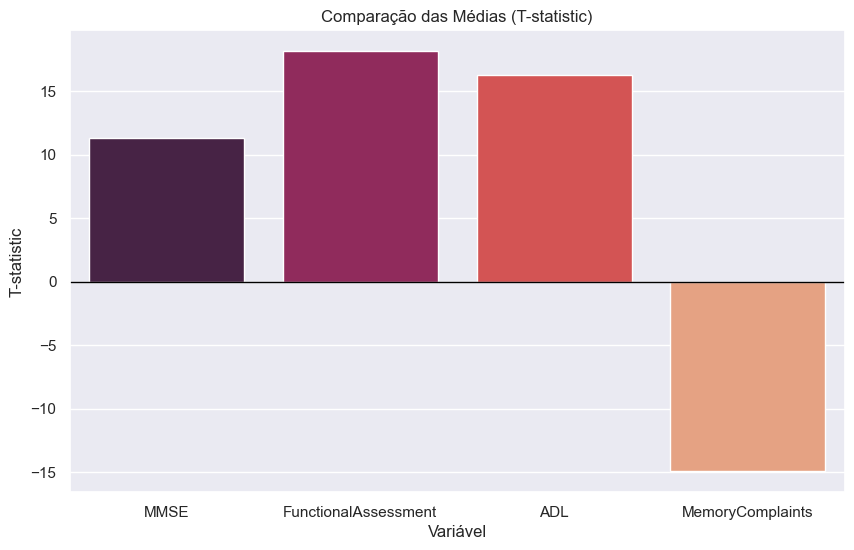

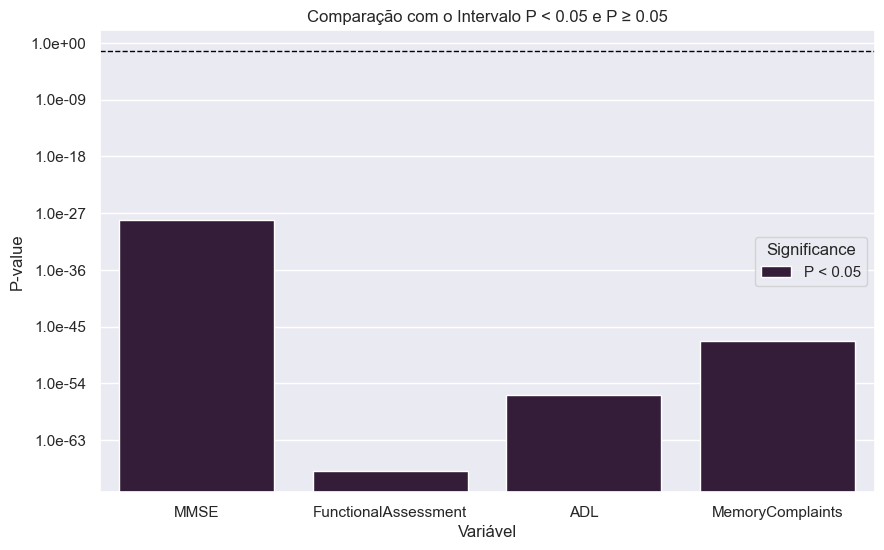

In [ ]:
# Realizar os testes T
tests = {
    'MMSE': ttest_ind(df[df['Diagnosis'] == 0]['MMSE'], df[df['Diagnosis'] == 1]['MMSE']),
    'FunctionalAssessment': ttest_ind(df[df['Diagnosis'] == 0]['FunctionalAssessment'], df[df['Diagnosis'] == 1]['FunctionalAssessment']),
    'ADL': ttest_ind(df[df['Diagnosis'] == 0]['ADL'], df[df['Diagnosis'] == 1]['ADL']),
    'MemoryComplaints': ttest_ind(df[df['Diagnosis'] == 0]['MemoryComplaints'], df[df['Diagnosis'] == 1]['MemoryComplaints'])
}

# Preparar os dados para visualização
results = pd.DataFrame({
    'Variable': tests.keys(),
    'T-statistic': [test[0] for test in tests.values()],
    'P-value': [test[1] for test in tests.values()]
})

# Gráfico de T-statistic
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='Variable', y='T-statistic', hue="Variable",palette='rocket')
plt.axhline(0, color='black', linewidth=1)
plt.title('Comparação das Médias (T-statistic)')
plt.xlabel('Variável')
plt.ylabel('T-statistic')
plt.show()

# Adicionar coluna para significância
results['Significance'] = results['P-value'].apply(lambda x: 'P < 0.05' if x < 0.05 else 'P ≥ 0.05')

# Gráfico de P-value
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='Variable', y='P-value', hue='Significance',)
plt.axhline(0.05, color='black', linestyle='--', linewidth=1)
plt.yscale('log')  # Definir a escala do eixo Y para logarítmica
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1e}'))  # Notação científica
plt.title('Comparação com o Intervalo P < 0.05 e P ≥ 0.05')
plt.xlabel('Variável')
plt.ylabel('P-value')
plt.show()